# PRE-PROCESSING Covid Project.
The aim of this part is not to create the best machine-learning algorithm. What we intend to do here is to check what are the pre-processings that will be usefull for our project. As a result, bench of things were tested, some worked, some didn't. But at the end of the day, we gained some clear insight on what we need to do to create a good machine learning program.

What will be seen here:
- Creation of a pipeline
- Utilisation of Polynomial features
- Utilisation of metrics such as the recall, F1-score, PR curves, confusion matrices to evaluate our models.
- How to check which feature in important for our model
- Basic ML procedures (train/test set, dealing with NaN etc...)
## Import the relevant libraries

In [95]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
sns.set()

## Load the dataset

In [96]:
path = 'C://Users//foucardguimax//Desktop//PortFolio//Dataset.xlsx'
raw_data = pd.read_excel(path)
df = raw_data.copy()

pd.set_option('display.max_row', df.shape[1])
pd.set_option('display.max_columns', df.shape[1])

In [97]:
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

We are back with the original dataset, with all its useless columns. We need to re-clean it and select only the features of interest that we spotted on the previous part of this project.

In [98]:
missing_rate = df.isna().sum()/df.shape[0]
missing_rate

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Hematocrit                                               0.893161
Hemoglobin                                               0.893161
Platelets                                                0.893338
Mean platelet volume                                     0.893870
Red blood Cells                                          0.893338
Lymphocytes                                              0.893338
Mean corpuscular hemoglobin concentration (MCHC)         0.893338
Leukocytes                                               0.893338
Basophils                                                0.893338
Mean corpu

In [99]:
blood_columns = list(df.columns[(missing_rate < 0.9) & (missing_rate > 0.88)])
viral_columns = list(df.columns[(missing_rate < 0.8) & (missing_rate > 0.75)])

In [100]:
key_columns = ['Patient age quantile', 'SARS-Cov-2 exam result']

In [101]:
df = df[key_columns + blood_columns + viral_columns]
df.shape

(5644, 33)

# TrainTest
As usual, we need to create a train set and a test set to build then evaluate our models.

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
trainset, testset = train_test_split(df, test_size = 0.2, random_state = 0)

In [104]:
trainset['SARS-Cov-2 exam result'].value_counts()

negative    4068
positive     447
Name: SARS-Cov-2 exam result, dtype: int64

In [105]:
testset['SARS-Cov-2 exam result'].value_counts()

negative    1018
positive     111
Name: SARS-Cov-2 exam result, dtype: int64

That was just to make sure we kept the same proportion of positives and negatives among our train and test set.
## Encoding

In [106]:
# This function will be used to encode the categorical data.
# This function is rather simple since there are not a lot of different values to encode (as we checked it through the exploration of the dataset)
def encoding(df):
    code = {'positive':1, 'negative':0, 'detected':1, 'not_detected':0}
    for col in df.select_dtypes('object'):
        df[col] = df[col].map(code)

    return(df)

In [149]:
# Here we will try to remove the Nan values as a first pre-processing action
def imputation(df):
    return(df.dropna())

In [108]:
def preprocessing(df):
    
    df = encoding(df)
    df = imputation(df)
    
    X = df.drop('SARS-Cov-2 exam result', axis = 1)
    y = df['SARS-Cov-2 exam result']
    
    print(y.value_counts())
    
    return(X, y)

In [109]:
X_train, y_train = preprocessing(trainset)

0    258
1     38
Name: SARS-Cov-2 exam result, dtype: int64


C:\Users\foucardguimax\Desktop\PYTHON\Python3.7\Machine-learnia\Regression\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [110]:
X_test, y_test = preprocessing(testset)

0    54
1    12
Name: SARS-Cov-2 exam result, dtype: int64


C:\Users\foucardguimax\Desktop\PYTHON\Python3.7\Machine-learnia\Regression\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


So, now we have created everything we need to make out first model of machine learning on this dataset. The preprocessing here is rather simple in order to have first insights on what we will need to preprocess next.

## Modelling
We will build a first model using a Decision Tree. It's a simple model of ML, and we don't need to standardize the values yet. It will help us to gain first insights on what we need to do.

In [111]:
from sklearn.tree import DecisionTreeClassifier

In [112]:
model = DecisionTreeClassifier(random_state=0)

## Metrics

In [113]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [114]:
def evaluation(model):
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train, cv = 4, scoring='f1', train_sizes=np.linspace(0.1,1,10))
    
    plt.figure(figsize=(12,8))
    plt.plot(N, train_score.mean(axis = 1), label = 'train score')
    plt.plot(N, val_score.mean(axis = 1), label = 'validation score')
    plt.legend()

[[52  2]
 [10  2]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.90        54
           1       0.50      0.17      0.25        12

    accuracy                           0.82        66
   macro avg       0.67      0.56      0.57        66
weighted avg       0.78      0.82      0.78        66



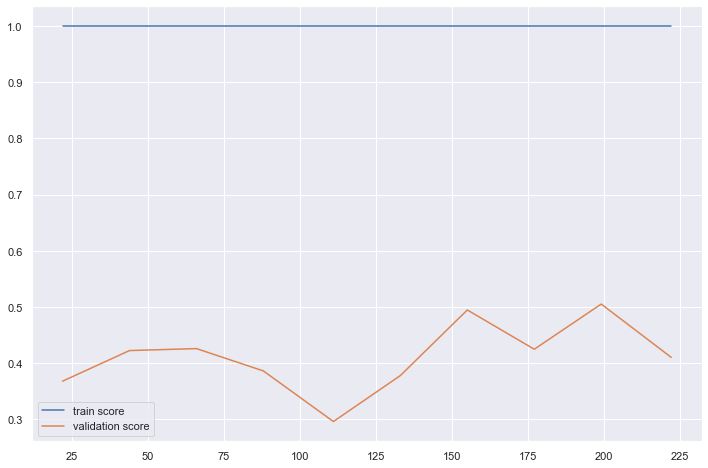

In [115]:
evaluation(model)

Among the 12 patients infected with the covid, only 2 were correctly classified with this model (recall = 17%). This model is not good but it was developped in 5 minutes ! Time to upgrade it.

What we can say from this graph:
- This is the F1 score only. It reaches 50% at most.
- Our model is overfitted, the difference between the test_score and the train_score is way too high

Let's see what are the most important features selected by the model.

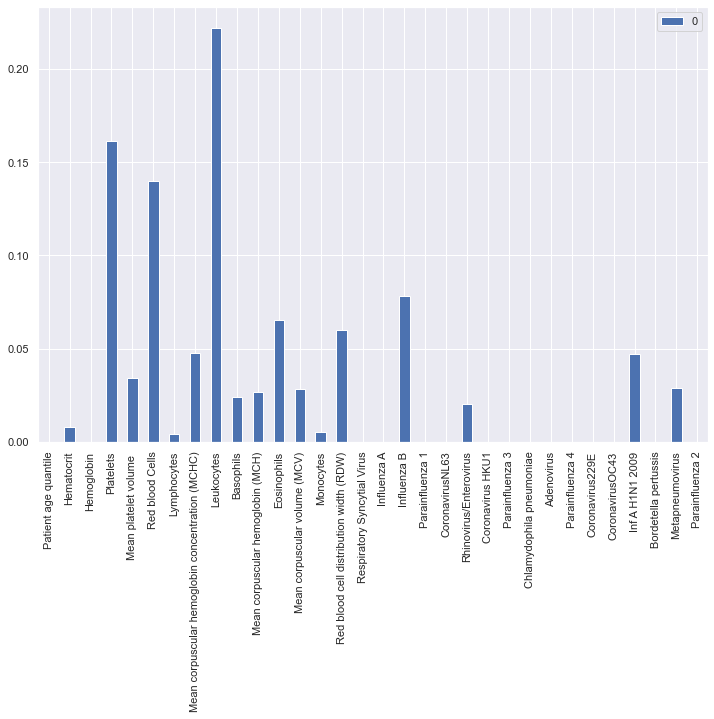

In [116]:
pd.DataFrame(model.feature_importances_, index = X_train.columns).plot.bar(figsize=(12,8))

For our model, blood data seems more important than viral data. But this is no surprise. We have seen that the Platelets, leukocytes etc... might be interesting to classify the patients. What we can do:
- we can create a threshold. All variables below the threshold won't be taken
- Since all the viral data seems les important, why consider them ?

In [117]:
df_blood = df[key_columns + blood_columns]
trainset_bd, testset_bd = train_test_split(df_blood, test_size = 0.2, random_state = 0)
X_train, y_train = preprocessing(trainset_bd)
X_test, y_test = preprocessing(testset_bd)

0    422
1     65
Name: SARS-Cov-2 exam result, dtype: int64
0    95
1    16
Name: SARS-Cov-2 exam result, dtype: int64


C:\Users\foucardguimax\Desktop\PYTHON\Python3.7\Machine-learnia\Regression\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


[[87  8]
 [10  6]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        95
           1       0.43      0.38      0.40        16

    accuracy                           0.84       111
   macro avg       0.66      0.65      0.65       111
weighted avg       0.83      0.84      0.83       111



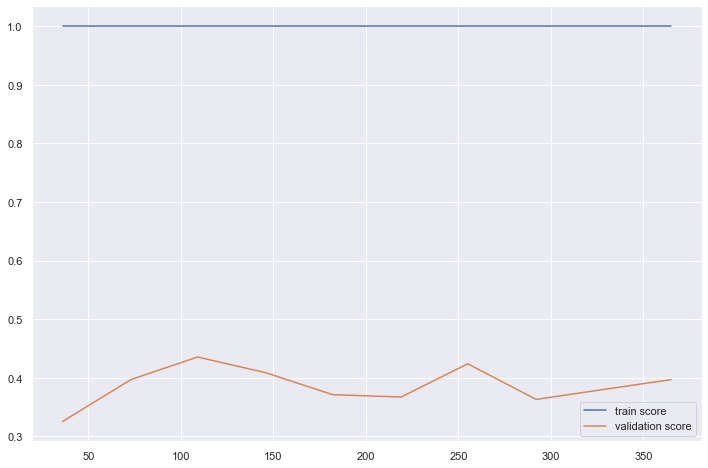

In [118]:
evaluation(model)

By deleting all the viral columns, we haven't really improved the prediction given by our model. It is still overfitted and the F1 score isn't great neither.

What if we try to change our TreeClassifier to a RandomForest ? It should deal better with overfitting.

In [119]:
from sklearn.ensemble import RandomForestClassifier

In [120]:
model2 = RandomForestClassifier(random_state=0)

In [121]:
trainset, testset = train_test_split(df, test_size = 0.2, random_state = 0)
X_train, y_train = preprocessing(trainset)
X_test, y_test = preprocessing(testset)

0    258
1     38
Name: SARS-Cov-2 exam result, dtype: int64
0    54
1    12
Name: SARS-Cov-2 exam result, dtype: int64


C:\Users\foucardguimax\Desktop\PYTHON\Python3.7\Machine-learnia\Regression\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


During the exploration of the dataset (cf COVID part1) we've seen that blood levels of people infected with something different than the COVID have blood levels different from people infected with the COVID. Let's create the feature 'is_sick' again.

In [122]:
def feature_engineering(df):
    df['is_scik'] = df[viral_columns].sum(axis=1) >= 1
    df = df.drop(viral_columns, axis = 1)
    return(df)

In [123]:
def preprocessing2(df):
    
    df = encoding(df)
    df = feature_engineering(df)
    df = imputation(df)
    
    X = df.drop('SARS-Cov-2 exam result', axis = 1)
    y = df['SARS-Cov-2 exam result']
    
    print(y.value_counts())
    
    return(X, y)

In [124]:
X_train, y_train = preprocessing2(trainset)
X_test, y_test = preprocessing2(testset)

0    422
1     65
Name: SARS-Cov-2 exam result, dtype: int64
0    95
1    16
Name: SARS-Cov-2 exam result, dtype: int64


C:\Users\foucardguimax\Desktop\PYTHON\Python3.7\Machine-learnia\Regression\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


[[92  3]
 [13  3]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        95
           1       0.50      0.19      0.27        16

    accuracy                           0.86       111
   macro avg       0.69      0.58      0.60       111
weighted avg       0.82      0.86      0.83       111



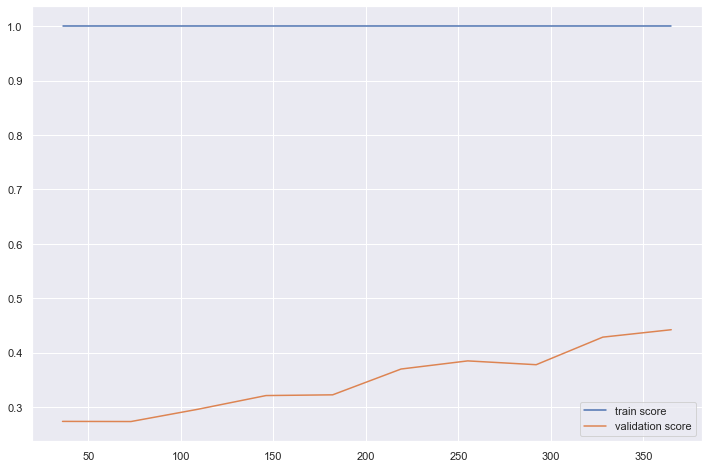

In [125]:
evaluation(model2)

The new model is still not good. However, it seems like the more data, the better the F1 score on this model.

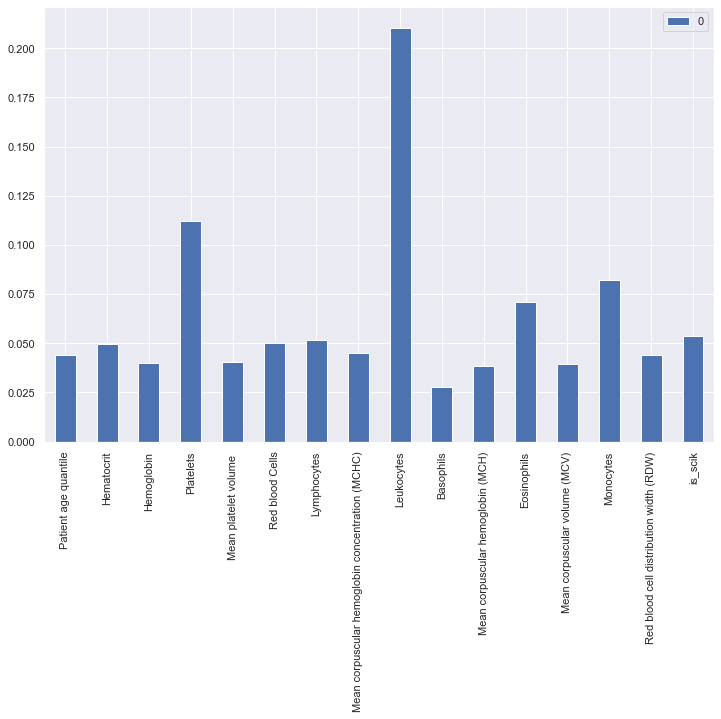

In [126]:
pd.DataFrame(model2.feature_importances_, index = X_train.columns).plot.bar(figsize=(12,8))

We can see here that there are still a lot of "useless" features considered by our model. The feature we createdis not that relevant (compared to the leukocytes, Platelets etc...)

In [137]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif

In [138]:
model3 = make_pipeline(SelectKBest(f_classif, k=10),
                      RandomForestClassifier(random_state=0))

Thanks to the Anova test (imported with f_classif) we will pick the 10 best features for our model

[[92  3]
 [11  5]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        95
           1       0.62      0.31      0.42        16

    accuracy                           0.87       111
   macro avg       0.76      0.64      0.67       111
weighted avg       0.85      0.87      0.86       111



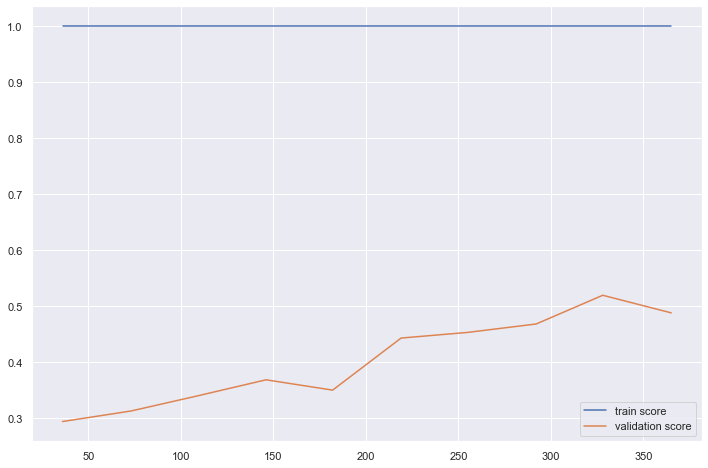

In [139]:
evaluation(model3)

Things are getting a bit better.
- The model is still overfitted but,
- The F1-score increased
- The recall increased (30% of people infected with the COVID were correctly classified)

Let's try different values of k:

[[90  5]
 [ 9  7]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        95
           1       0.58      0.44      0.50        16

    accuracy                           0.87       111
   macro avg       0.75      0.69      0.71       111
weighted avg       0.86      0.87      0.87       111



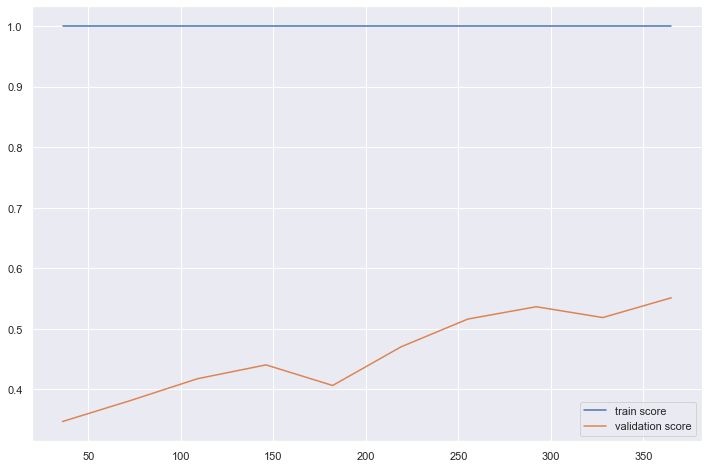

In [136]:
model31 = make_pipeline(SelectKBest(f_classif, k=4),
                      RandomForestClassifier(random_state=0))
evaluation(model31)

In the begining, the dataset contained 111 features and we are now working with only 5 and still managed to correctly classify 44% of the patients. However, it is only for 16 positive cases, it won't be enough on larger dataset.

Let's try to use polynomialfeatures to increase the weight of the more relevant features and see what happen.

In [144]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

[[91  4]
 [11  5]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        95
           1       0.56      0.31      0.40        16

    accuracy                           0.86       111
   macro avg       0.72      0.64      0.66       111
weighted avg       0.84      0.86      0.85       111



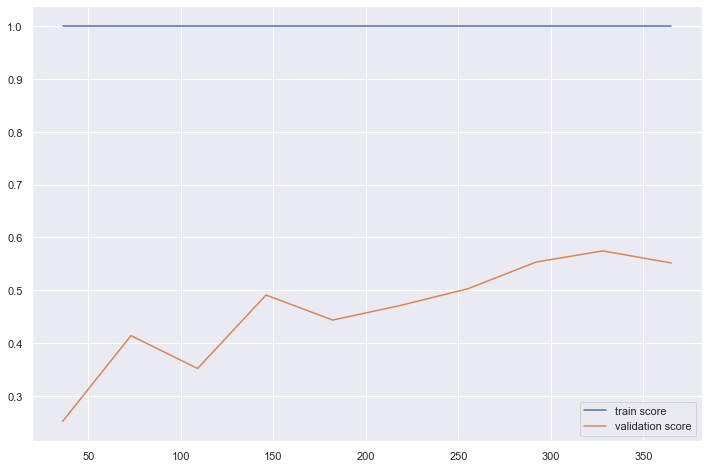

In [148]:
model4 = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(f_classif, k=10),
                    RandomForestClassifier(random_state=0))
evaluation(model4)

It's important to use 'include_bias=False' while using the polynomialFeature to avoid getting a lot of error messages (f_classif doesn't like constant values).